<a href="https://colab.research.google.com/github/zbrze/MOWNIT-python-/blob/master/MOwNiT_lab_%C4%87w_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 


### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 



In [0]:
import numpy as np
def lookupTab(fx, steps):
  val_x = np.array(np.linspace(0, 11, steps))
  array_y = np.zeros([steps])
  for i in range(len(val_x)):
    array_y[i] = fx(val_x[i])
  return array_y

In [0]:
import matplotlib.pyplot as plt
def draw(poly):
  p = np.flip(poly.coeffs, axis=0)
  x_axis = np.linspace(0, 10, num=5000)
  y_axis = np.polyval(p, x_axis)
  plt.plot(x_axis, y_axis)
  plt.show()

In [0]:
def getPoints(steps):
    val_x=np.linspace(0, 10, steps)
    points=np.zeros([len(val_x)-1])
    for i in range(len(val_x)-1):
        points[i]=(val_x[i+1]-val_x[i])/2+val_x[i]
    return points

In [0]:
#m - liczba fcji bazowych
def least_squares_aproxy(val_y, val_x, m):
  n = len(val_x)
  matrix_x = np.zeros((m+1, m+1))

  for i in range(m+1):
     for j in range(m+1):
        suma = 0
        pow_x = j + i
        for k in range (n):
          suma += pow(val_x[k], pow_x)
        matrix_x[i][j] = suma

  y = np.linalg.inv(matrix_x)

  coff_tab = [0] * (m + 1)
  for i in range (m + 1):
    for j in range (n):
      coff_tab[i] += pow(val_x[j], i) *val_y[j]

  poly = (np.matmul(coff_tab, y))[::-1]
  poly = np.poly1d(poly)
  return poly

In [0]:
import statistics
def ComparePrecision(fx, m, label):
  points = getPoints(100)
  val_x = np.array(np.linspace(0, 11, 100))
  poly = least_squares_aproxy(lookupTab(fx,100), val_x, m)
  results =  poly(points)
  error = (len(points)) *[0]
  for i in range(0, len(fx(points))):
    error[i] = abs(results[i] - fx((points)[i]))/abs(fx((points)[i]))
 
  plt.plot(points, results, label ='approx' + str(m))
  plt.plot(points, fx(points), 'r--', label=label)
  plt.title('Approximation of ' + label+ 'm= '+ str(m))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  print('\033[1m' +"mean of statistic error: ",statistics.mean(error))

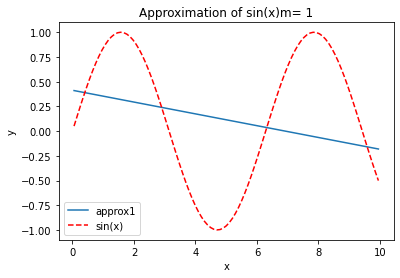

mean of statistic error:  1.1605520045864166





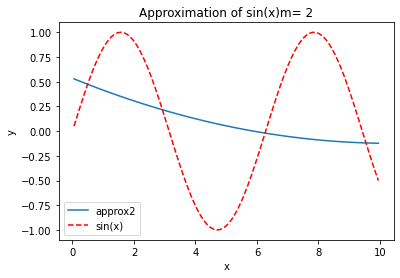

mean of statistic error:  1.1524650311838698





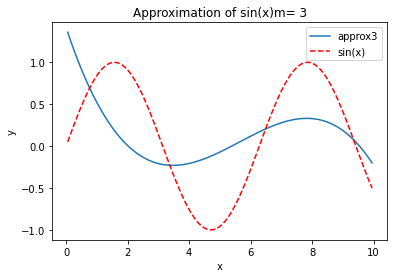

mean of statistic error:  1.2977130756609767





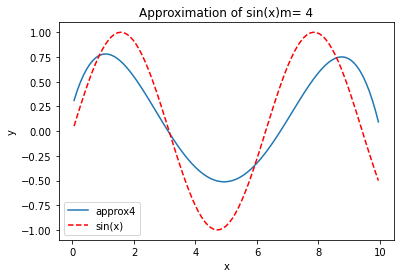

mean of statistic error:  1.1184825506922647





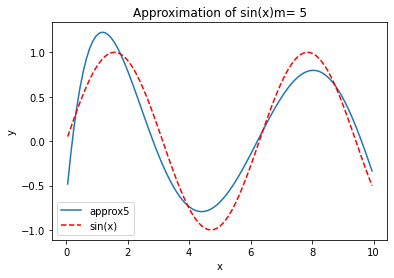

mean of statistic error:  0.6770295935827607





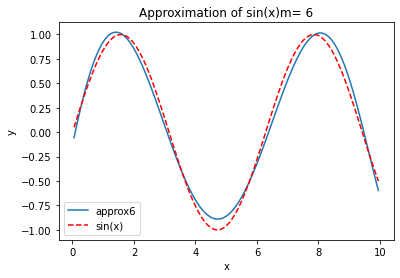

mean of statistic error:  0.2614856481773948





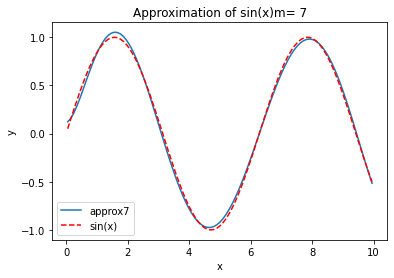

mean of statistic error:  0.10355987299883748





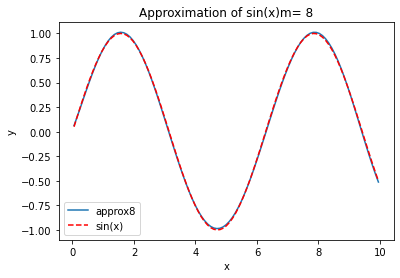

mean of statistic error:  0.04304347992643548





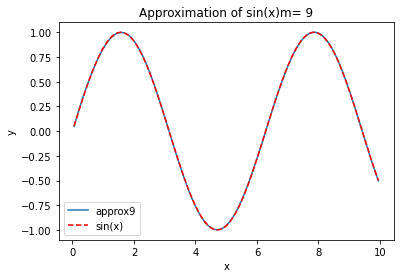

mean of statistic error:  0.008779199567751932





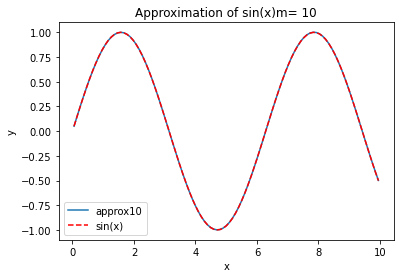

mean of statistic error:  0.0026300258239511792





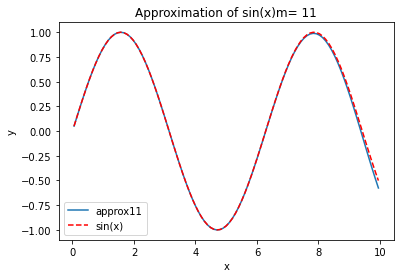

mean of statistic error:  0.05448406800160584


In [24]:

ComparePrecision(lambda x: np.sin(x), 1, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 2, "sin(x)")
print("\n\n")
ComparePrecision(lambda x: np.sin(x), 3, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 4, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 5, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 6, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 7, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 8, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 9, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 10, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 11, "sin(x)")

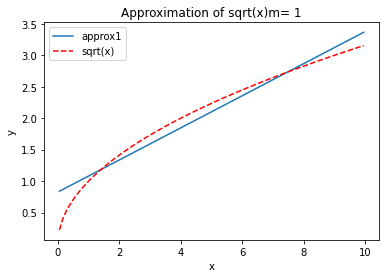

mean of statistic error:  0.10815826852540929





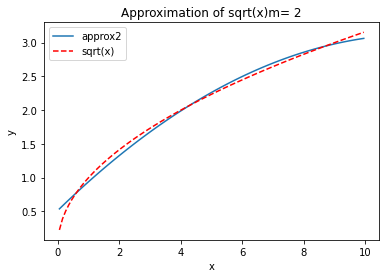

mean of statistic error:  0.04636537094819879





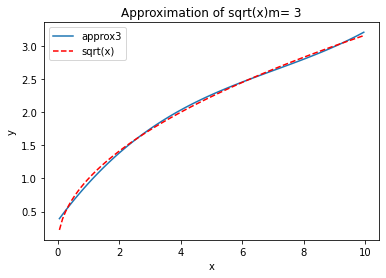

mean of statistic error:  0.025631023227342304





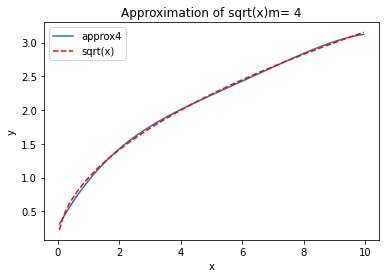

mean of statistic error:  0.016335233677210854





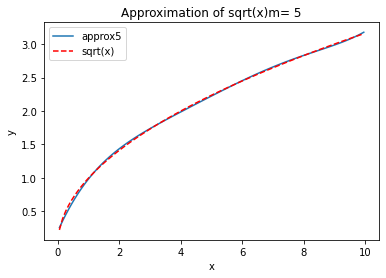

mean of statistic error:  0.012010781379973178





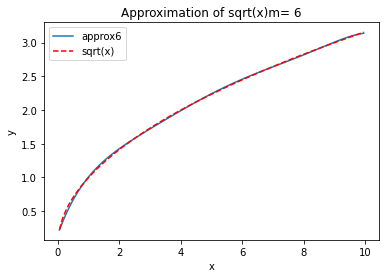

mean of statistic error:  0.009007685939446612





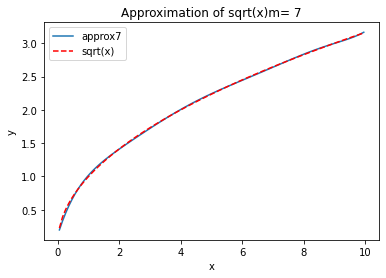

mean of statistic error:  0.008727279692092508





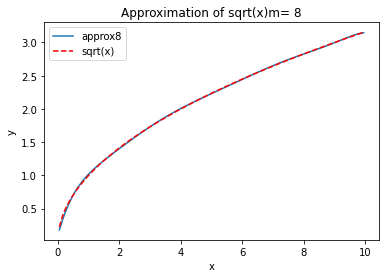

mean of statistic error:  0.00831484703551206





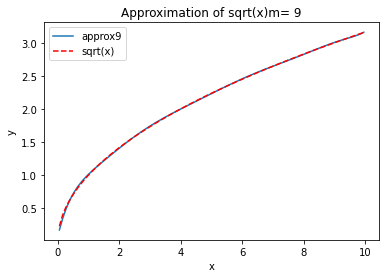

mean of statistic error:  0.007780892019415841





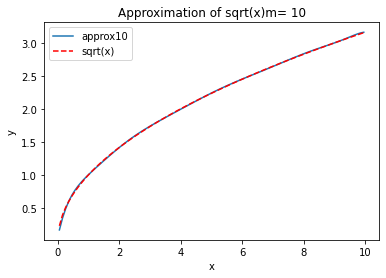

mean of statistic error:  0.007287755107171603


In [12]:

ComparePrecision(lambda x: np.sqrt(x), 1, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 2, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 3, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 4, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 5, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 6, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 7, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 8, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 9, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 10, "sqrt(x)")

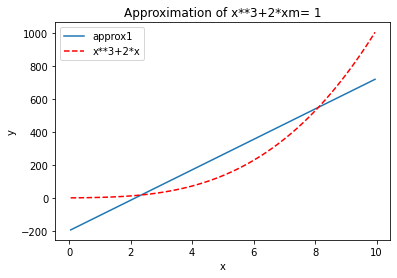

mean of statistic error:  38.244777450419086





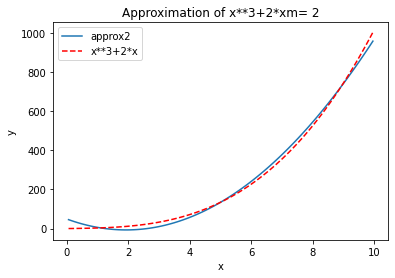

mean of statistic error:  7.835392167535331





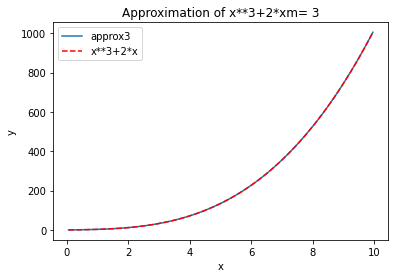

mean of statistic error:  1.295500033988115e-12





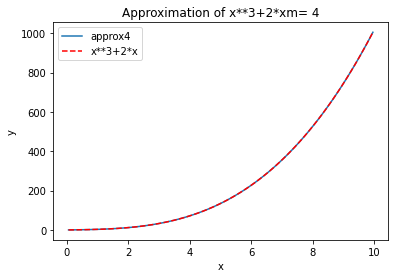

mean of statistic error:  1.2375536324741068e-11





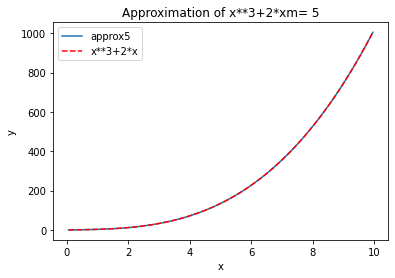

mean of statistic error:  1.4289183513941293e-10





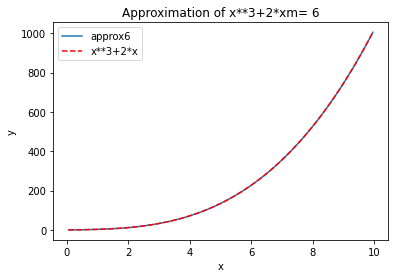

mean of statistic error:  2.120166470790051e-09





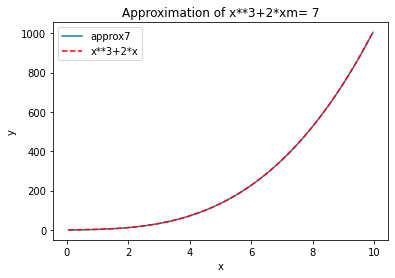

mean of statistic error:  2.9817666334978597e-08





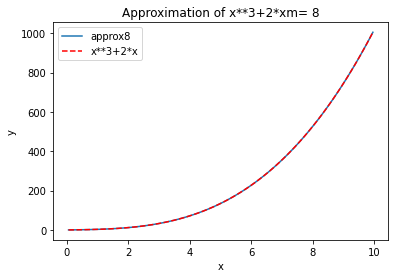

mean of statistic error:  7.257967718862083e-07





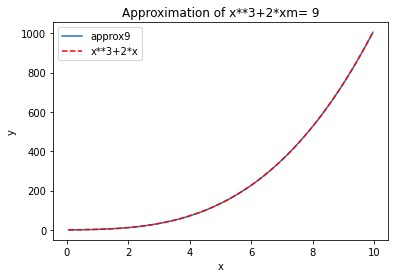

mean of statistic error:  3.631297215591587e-06





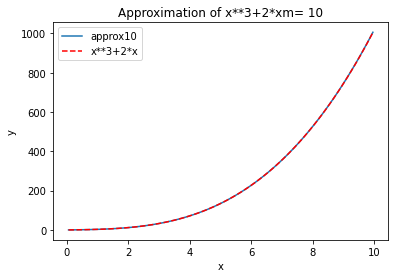

mean of statistic error:  0.00021603498076221226


In [13]:
ComparePrecision(lambda x: (x**3+2*x), 1, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 2, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 3, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 4, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 5, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 6, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 7, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 8, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 9, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 10, "x**3+2*x")

### **WNIOSKI**
Stopień wielomianu (m) znacznie wpływa na dokładność aproksymacji funkcji, jednak jest on również mocno zależny od liczby punktów w których wartość funkcji jest znana. Z moich obserwacji wynika że dla 100 punktów szczyt dokładności osiąga aproksymacja wielomianem o stopniu 10 - błąd dla wielomianów o większym stopniu zaczyna wzrastać. Dlatego uważam, że stopień wielomianu powinien być proporcjonalny do liczby danych punktów.

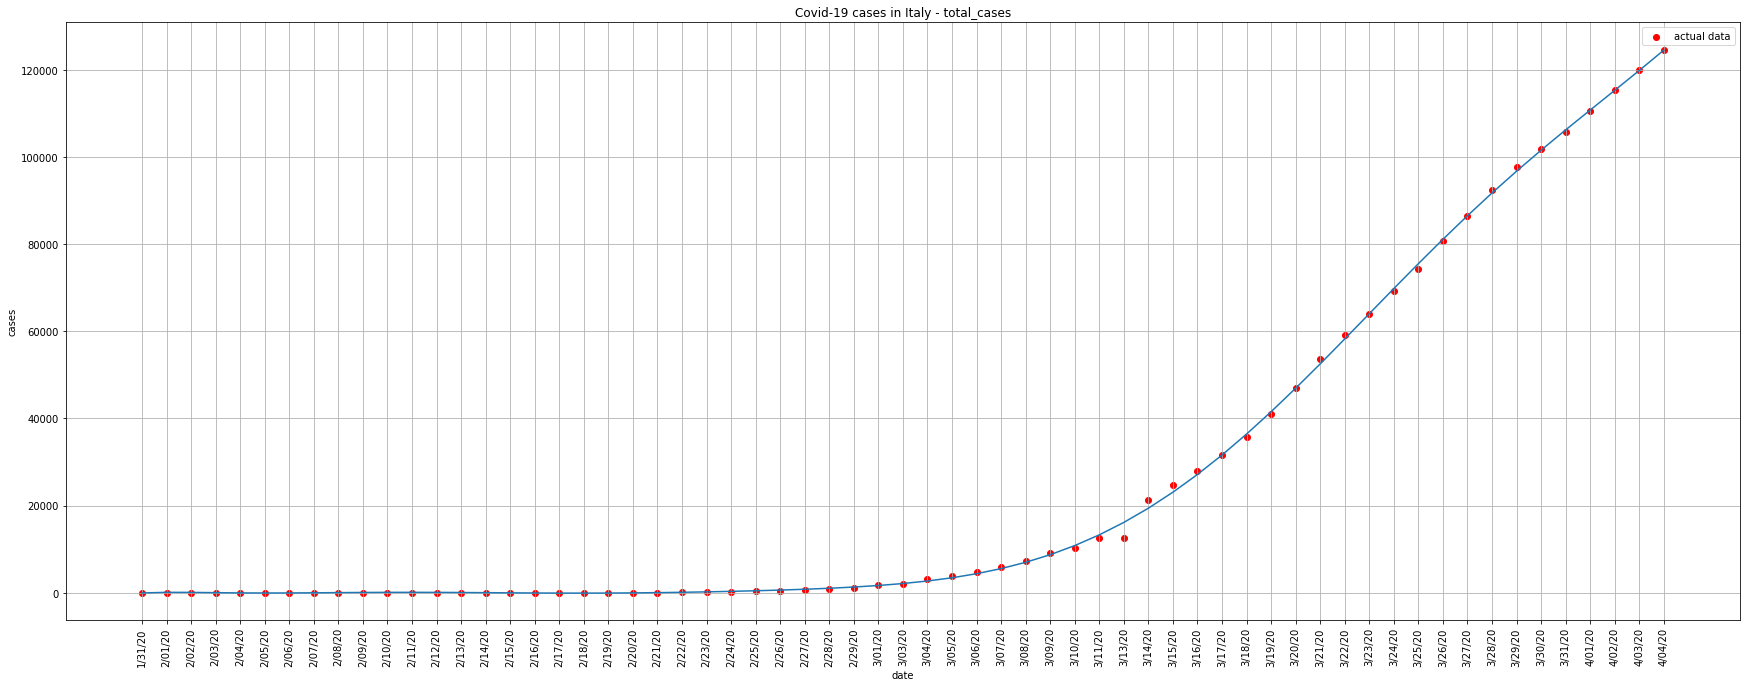

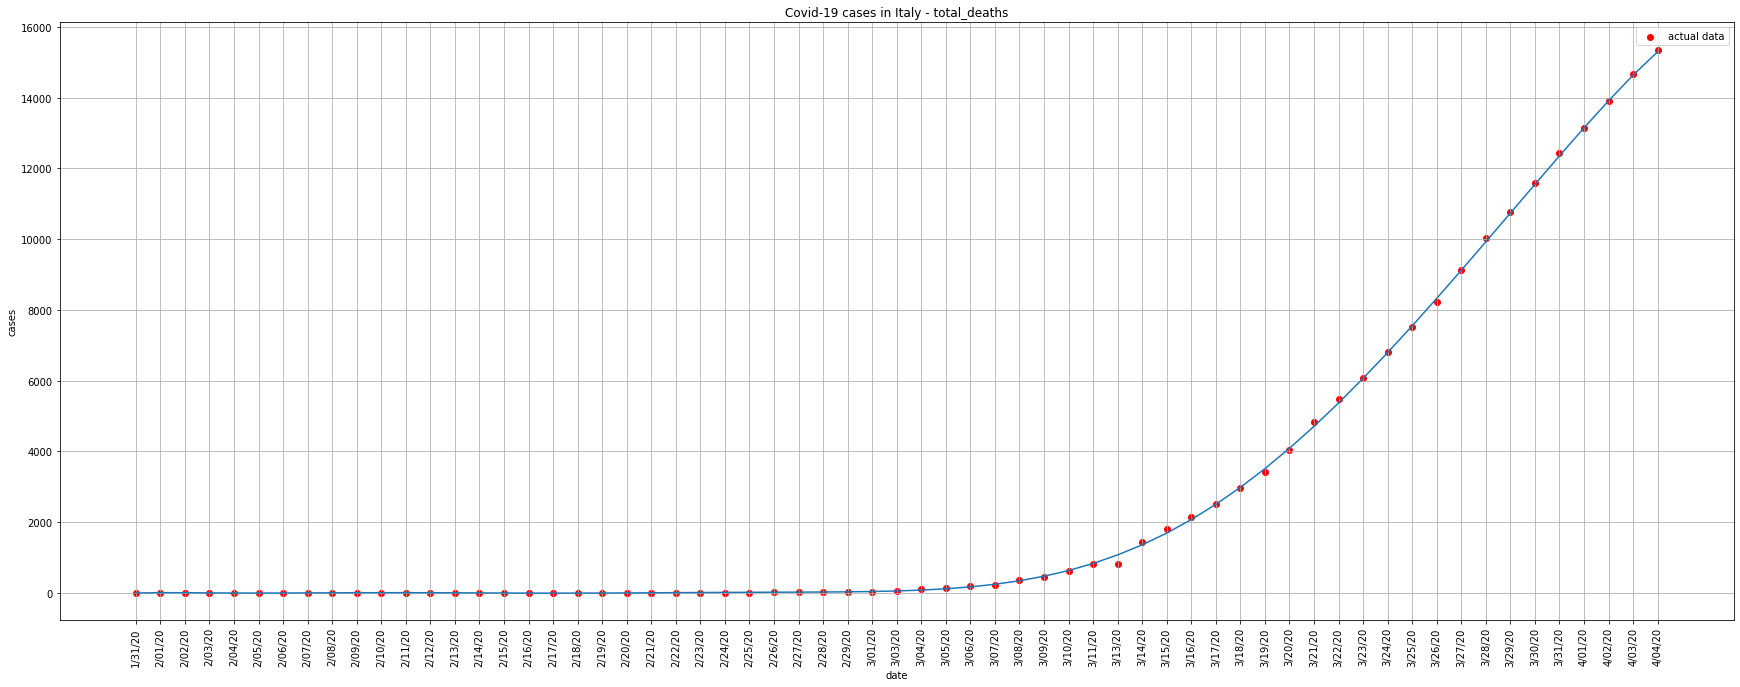

In [14]:
from matplotlib.pyplot import figure
import requests
import json
from contextlib import closing
import csv
import numpy as np
def approximate_corona_curve_italy(m, type):
  response = requests.get('https://api.thevirustracker.com/free-api?countryTimeline=IT')
  content = json.loads(response.text)
  content = content['timelineitems'][0]
  length = len(content)
  counter = 0
  date_array = []
  data = []
  for i in content:
        if counter < length - 1:
            data.append(content[str(i)][type])
            date_array.append(i)
        counter += 1

  unique, rev = np.unique(date_array, return_inverse=True)
  poly = least_squares_aproxy(data, np.linspace(1, len(data), len(data)), m)
  results = poly(np.linspace(1, len(data), len(data)))

  fig,ax=plt.subplots()
  fig.set_size_inches(30, 11)
  ax.plot(rev,results)
  ax.scatter(rev, data, c = "red", label="actual data")
  ax.set_xticks(range(len(unique)))
  ax.set_xticklabels(unique)
  plt.title('Covid-19 cases in Italy - ' +type)
  plt.xticks(rotation=90)
  plt.xlabel('date')
  plt.grid(True, which='major')
  plt.ylabel('cases')
  plt.legend()
  plt.show()

approximate_corona_curve_italy(10, "total_cases")
approximate_corona_curve_italy(10, "total_deaths")